<h1>Starting</h1>

Importing Libraries 

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

%matplotlib inline
pd.set_option('display.max_columns', None)

Reading CSV

In [2]:
# Loading the amazon price prediction dataset (assuming the file name is "amz_uk_price_prediction_dataset.csv")

amz_price_df = pd.read_csv("C:/Users/dalmi/Documents/España/Data Analytics - IronHack/Labs/Semana 4/lab-eda-univariate/amz_uk_price_prediction_dataset.csv")
amz_price_df

,uid,asin,title,stars,reviews,price,isBestSeller,boughtInLastMonth,category
0,1,B09B96TG33,"Echo Dot (5th generation, 2022 release) | Big ...",4.7,15308,21.99,False,0,Hi-Fi Speakers
1,2,B01HTH3C8S,"Anker Soundcore mini, Super-Portable Bluetooth...",4.7,98099,23.99,True,0,Hi-Fi Speakers
2,3,B09B8YWXDF,"Echo Dot (5th generation, 2022 release) | Big ...",4.7,15308,21.99,False,0,Hi-Fi Speakers
3,4,B09B8T5VGV,"Echo Dot with clock (5th generation, 2022 rele...",4.7,7205,31.99,False,0,Hi-Fi Speakers
4,5,B09WX6QD65,Introducing Echo Pop | Full sound compact Wi-F...,4.6,1881,17.99,False,0,Hi-Fi Speakers
...,...,...,...,...,...,...,...,...,...
2443646,2828589,B0CHSD7P2Q,"Motorbike Armour, Motorbike Clothing, Cycling ...",0.0,0,22.34,False,0,Motorbike Clothing
2443647,2828590,B0B7B8FNBQ,PROFIRST Waterproof Motorcycle 2 Piece Ladies ...,0.0,0,97.99,False,0,Motorbike Clothing
2443648,2828591,B0BD5FL5FB,Men’s Motorcycle Motorbike Biker Trousers Kevl...,0.0,0,52.99,False,0,Motorbike Clothing
2443649,2828592,B008OYLL4I,Texpeed Mens Motorcycle Motorbike Biker Trouse...,4.3,404,79.99,False,0,Motorbike Clothing


Data OverView

In [3]:
amz_price_df.shape

(2443651, 9)

In [4]:
amz_price_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2443651 entries, 0 to 2443650
Data columns (total 9 columns):
 #   Column             Dtype  
---  ------             -----  
 0   uid                int64  
 1   asin               object 
 2   title              object 
 3   stars              float64
 4   reviews            int64  
 5   price              float64
 6   isBestSeller       bool   
 7   boughtInLastMonth  int64  
 8   category           object 
dtypes: bool(1), float64(2), int64(3), object(3)
memory usage: 151.5+ MB


Variable Clasification:
Numerical & Categorical

In [5]:
# Separamos en un dataframe llamado num las numericas y en un dataframe llamado "cat" las categoricas
amz_price_num = amz_price_df.select_dtypes(include="number")
amz_price_cat = amz_price_df.select_dtypes(exclude="number")

In [6]:
amz_price_num.head()

,uid,stars,reviews,price,boughtInLastMonth
0,1,4.7,15308,21.99,0
1,2,4.7,98099,23.99,0
2,3,4.7,15308,21.99,0
3,4,4.7,7205,31.99,0
4,5,4.6,1881,17.99,0


In [7]:
amz_price_cat.head()

,asin,title,isBestSeller,category
0,B09B96TG33,"Echo Dot (5th generation, 2022 release) | Big ...",False,Hi-Fi Speakers
1,B01HTH3C8S,"Anker Soundcore mini, Super-Portable Bluetooth...",True,Hi-Fi Speakers
2,B09B8YWXDF,"Echo Dot (5th generation, 2022 release) | Big ...",False,Hi-Fi Speakers
3,B09B8T5VGV,"Echo Dot with clock (5th generation, 2022 rele...",False,Hi-Fi Speakers
4,B09WX6QD65,Introducing Echo Pop | Full sound compact Wi-F...,False,Hi-Fi Speakers


In [8]:
amz_price_num.nunique()

uid                  2443651
stars                     42
reviews                19446
price                  82916
boughtInLastMonth         25
dtype: int64

In [9]:
amz_price_cat.nunique()

asin            2222742
title           2077591
isBestSeller          2
category            296
dtype: int64

In [10]:
amz_price_num.value_counts()

uid      stars  reviews  price   boughtInLastMonth
1        4.7    15308    21.99   0                    1
1833462  0.0    0        58.97   0                    1
1833464  0.0    0        76.97   0                    1
1833465  0.0    0        85.97   0                    1
1833466  4.2    110      162.51  0                    1
                                                     ..
889449   4.0    1        8.54    0                    1
889450   4.2    25       9.99    0                    1
889451   4.4    42       477.00  0                    1
889452   4.8    19       3.99    0                    1
2828593  4.5    34       53.99   0                    1
Name: count, Length: 2443651, dtype: int64

In [11]:
amz_price_cat.value_counts()

asin        title                                                                                                                                                                                    isBestSeller  category            
0000060259  Lakme Jewel Sindoor (Maroon) Pack Of 2                                                                                                                                                   False         Make-up                 1
B0BV2BJGF5  Warmhm Mic Belt Microphone Carrier Pouch Adjustable Anti Dropping Strap Microphone Waist Holder Pack for Fitness Instructors Theater Speakers                                            False         Recording & Computer    1
B0BV2BKB6C  South Sudan Watercolor Map art print poster, FRAMED with mount option -10941                                                                                                             False         Handmade Artwork        1
B0BV2BKG26  HEEPDD Compression Sports Shorts, Polyester C

<h1>Part 1: Understanding Product Categories</h1>

**Business Question**: What are the most popular product categories on Amazon UK, and how do they compare in terms of listing frequency?

1. **Frequency Tables**:
    - Generate a frequency table for the product `category`.
    - Which are the top 5 most listed product categories?

In [12]:
#Absolute Frequency Table for Product Categories

freq_abs_amz_price_table = amz_price_df["category"].value_counts().reset_index()
freq_abs_amz_price_table

,category,count
0,Sports & Outdoors,836265
1,Beauty,19312
2,"Handmade Clothing, Shoes & Accessories",19229
3,Bath & Body,19092
4,Birthday Gifts,18978
...,...,...
291,Alexa Built-In Devices,107
292,Motorbike Chassis,107
293,Plugs,107
294,Smart Home Security & Lighting,104


In [13]:
#Define Column Names

freq_abs_amz_price_table.columns = ["categorie", "absolute_frequency"]
freq_abs_amz_price_table

,categorie,absolute_frequency
0,Sports & Outdoors,836265
1,Beauty,19312
2,"Handmade Clothing, Shoes & Accessories",19229
3,Bath & Body,19092
4,Birthday Gifts,18978
...,...,...
291,Alexa Built-In Devices,107
292,Motorbike Chassis,107
293,Plugs,107
294,Smart Home Security & Lighting,104


In [14]:
#Top 5 Most Listed Product Categories

top5_freq_abs_amz_price_table = freq_abs_amz_price_table.head()
top5_freq_abs_amz_price_table

,categorie,absolute_frequency
0,Sports & Outdoors,836265
1,Beauty,19312
2,"Handmade Clothing, Shoes & Accessories",19229
3,Bath & Body,19092
4,Birthday Gifts,18978


In [15]:
#Relative Frequency Table for Products

freq_rel_amz_price_table = amz_price_df["category"].value_counts(normalize=True).round(2).reset_index()
freq_rel_amz_price_table


,category,proportion
0,Sports & Outdoors,0.34
1,Beauty,0.01
2,"Handmade Clothing, Shoes & Accessories",0.01
3,Bath & Body,0.01
4,Birthday Gifts,0.01
...,...,...
291,Alexa Built-In Devices,0.00
292,Motorbike Chassis,0.00
293,Plugs,0.00
294,Smart Home Security & Lighting,0.00


In [16]:
#Define Column Names

freq_rel_amz_price_table.columns = ["categorie", "relative_frequency"]
freq_rel_amz_price_table

,categorie,relative_frequency
0,Sports & Outdoors,0.34
1,Beauty,0.01
2,"Handmade Clothing, Shoes & Accessories",0.01
3,Bath & Body,0.01
4,Birthday Gifts,0.01
...,...,...
291,Alexa Built-In Devices,0.00
292,Motorbike Chassis,0.00
293,Plugs,0.00
294,Smart Home Security & Lighting,0.00


In [17]:
#Top 5 Most Listed Product Categories

top5_freq_rel_amz_price_table = freq_rel_amz_price_table.head()
top5_freq_rel_amz_price_table

,categorie,relative_frequency
0,Sports & Outdoors,0.34
1,Beauty,0.01
2,"Handmade Clothing, Shoes & Accessories",0.01
3,Bath & Body,0.01
4,Birthday Gifts,0.01


2. **Visualizations**:
    - Display the distribution of products across different categories using a bar chart. *If you face problems understanding the chart, do it for a subset of top categories.*
    - For a subset of top categories, visualize their proportions using a pie chart. Does any category dominate the listings?

Bar Chart of Product Categories (ALL CATEGORIES)

C:\Users\dalmi\AppData\Local\Temp\ipykernel_27376\4181320323.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


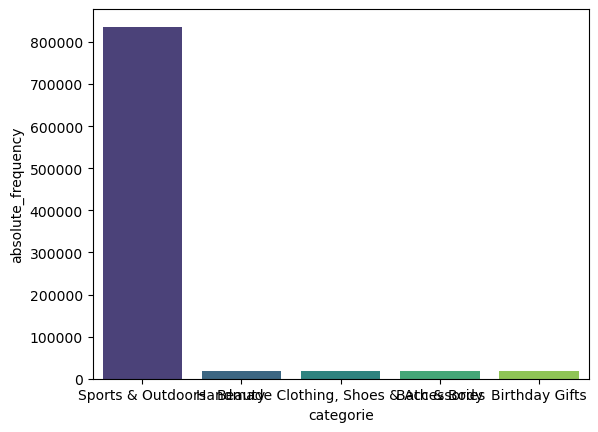

In [18]:
sns.barplot(
    x='categorie',
    y='absolute_frequency',
    data=top5_freq_abs_amz_price_table,
    palette='viridis',
)
plt.show()

Bar Chart of Product Categories (TOP 5 CATEGORIES)


C:\Users\dalmi\AppData\Local\Temp\ipykernel_27376\4181320323.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


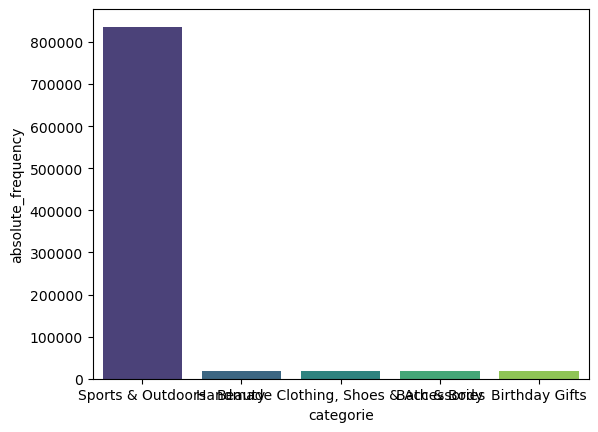

In [20]:
sns.barplot(
    x='categorie',
    y='absolute_frequency',
    data=top5_freq_abs_amz_price_table,
    palette='viridis',
)
plt.show()

Pie Chart of Product Categories (TOP 5 CATEGORIES)

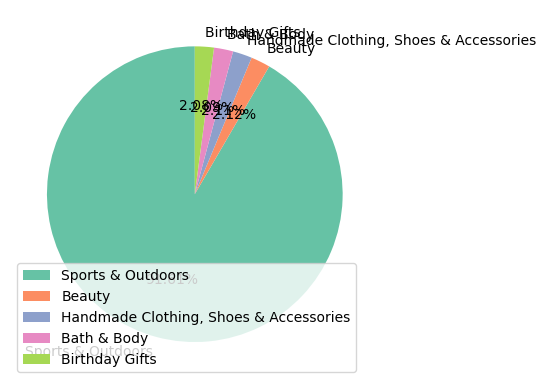

In [21]:
#Use Relative Frequency for Pie Chart

top5_freq_abs_amz_price_table.plot.pie(
    y='absolute_frequency',  # Especifica la columna de valores
    labels=top5_freq_abs_amz_price_table['categorie'],  # Muestra las categorías
    autopct='%1.2f%%',
    startangle=90,
    colors=sns.color_palette('Set2')
)
plt.ylabel('')  # Opcional: elimina el título de la columna 'relative_frequency'
plt.show()

<h1>Part 2: Delving into Product Pricing</h1>

**Business Question**: How are products priced on Amazon UK, and are there specific price points or ranges that are more common?

1. **Measures of Centrality**:
    - Calculate the mean, median, and mode for the `price` of products.
    - What's the average price point of products listed? How does this compare with the most common price point (mode)?

Statistics of Price Products

In [22]:
#Mean

amz_price_df["price"].mean()

89.24380943923663

In [23]:
#Median

amz_price_df["price"].median()

19.09

In [24]:
#Mode

amz_price_df["price"].mode()


0    9.99
Name: price, dtype: float64

In [25]:
#La media de precios = 89.24 es mucho mayor que el valor más frecuente = 9.99, lo que significa que 
#la mayoría de los datos se agrupan en valores más bajos, pero hay precios altos que elevan la moda
#y generan una cola hacia la derecha en la distribución (positiva).

2. **Measures of Dispersion**:
    - Determine the variance, standard deviation, range, and interquartile range for product `price`.
    - How varied are the product prices? Are there any indicators of a significant spread in prices?


Statistics of Price Products

In [26]:
#Variance

amz_price_df["price"].var() #dispersión significativa de los precios alrededor de la media.

119445.48532256528

In [27]:
#Standadrd Deviation

amz_price_df["price"].std() # los precios de los productos se desvían mucho del promedio, reflejando una gran variación entre los valores.

345.60886175352226

In [28]:
#Interquartile range

q1 = amz_price_df["price"].quantile(0.25)
q3 = amz_price_df["price"].quantile(0.75)
iqr = q3 - q1
iqr
#un IQR de 36 significa que los precios en el 50% central de los datos (entre el primer y tercer cuartil)
# presentan una dispersión notable, lo que indica diferencias importantes en los precios medianos.

36.0

In [29]:
#En conjunto, estos valores muestran una amplia variabilidad y un rango significativo en los 
# precios de los productos, lo que podría ser resultado de una mezcla de productos de bajo y 
# alto costo.

3. **Visualizations**:
    - Is there a specific price range where most products fall? Plot a histogram to visualize the distribution of product prices. *If its hard to read these diagrams, think why this is, and explain how it could be solved.*.
    - Are there products that are priced significantly higher than the rest? Use a box plot to showcase the spread and potential outliers in product pricing. 

Histogram of Prices

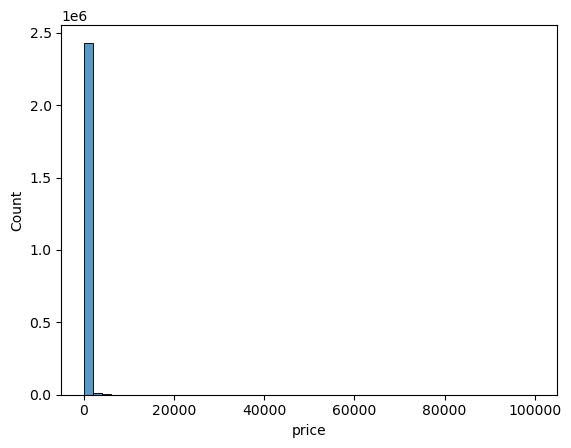

In [30]:
sns.histplot(amz_price_df.price, bins=50)
plt.show()

In [31]:
#Si bien en el gráfico no podemos visualizar qué precio es el que mas se repite, podemos sacarlo con la 
#moda. Es decir que el precio que más se repite es 9.99 euros.

Box Plot

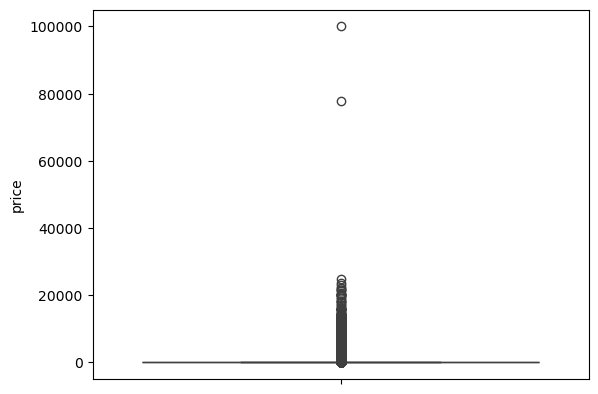

In [32]:
sns.boxplot(data=amz_price_df.price)
plt.show()

In [33]:
#Podemos apreciar en el gráfico de caja que los precios más altos son de 100.000 y 80.000 euros

<h1>Part 3: Unpacking Product Ratings</h1>

**Business Question**: How do customers rate products on Amazon UK, and are there any patterns or tendencies in the ratings?


1. **Measures of Centrality**:
    - Calculate the mean, median, and mode for the `rating` of products.
    - How do customers generally rate products? Is there a common trend?

In [34]:
#Mean

amz_price_df["stars"].mean()

2.152836472966065

In [35]:
#Median

amz_price_df["stars"].median()

0.0

In [36]:
#Mode

amz_price_df["stars"].mode()

0    0.0
Name: stars, dtype: float64

In [37]:
#Los clientes por lo general ponen un 0 de puntuación a los productos si observamos la moda.

2. **Measures of Dispersion**:
    - Determine the variance, standard deviation, and interquartile range for product `rating`.
    - Are the ratings consistent, or is there a wide variation in customer feedback?

In [38]:
#Variance

amz_price_df["stars"].var()

4.81743402976196

In [39]:
#Standard Deviation

amz_price_df["stars"].std()

2.1948653785054697

In [40]:
#Interquartile range

q1 = amz_price_df["stars"].quantile(0.25)
q3 = amz_price_df["stars"].quantile(0.75)
iqr = q3 - q1
iqr

4.4

In [41]:
#Podemos ver una amplia variación en las puntuaciones de los clientes y una tendencia a las 
#calificaciones bajas o nulas. O bien puede ser que se puntua 0 si el cliente no califica,
#y eso puede generar estos valores en las estadísticas.

3. **Shape of the Distribution**:
    - Calculate the skewness and kurtosis for the `rating` column. 
    - Are the ratings normally distributed, or do they lean towards higher or lower values?


In [42]:
#Skewness (sesgo)
#- Skewness = 0: The distribution is perfectly symmetrical, resembling a normal distribution.
#- Skewness > 0: The distribution is positively skewed (or right-skewed), meaning there is a longer tail on the right side of the distribution. The mass of the distribution is concentrated on the left of the figure.
#- Skewness < 0: The distribution is negatively skewed (or left-skewed), meaning there is a longer tail on the left side of the distribution. The mass of the distribution is concentrated on the right of the figure.

amz_price_df.stars.skew().round(2)

0.08

In [43]:
#Como el valor del sesgo nos da mayor que 0, significa que los valores estan concentrados principalmente 
#a la derecha de la campana de la distribución.

4. **Visualizations**:
    - Plot a histogram to visualize the distribution of product ratings. Is there a specific rating that is more common?

Histogram of Stars

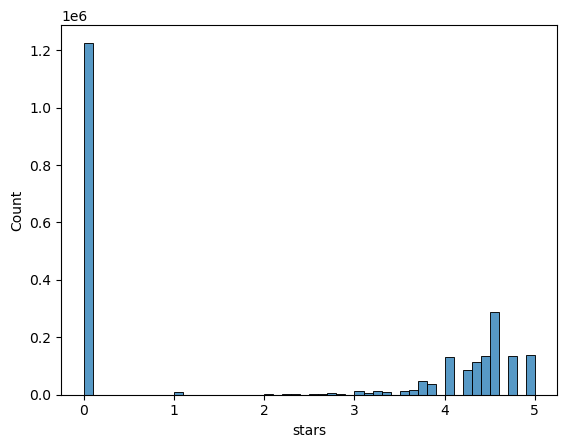

In [44]:
sns.histplot(amz_price_df.stars, bins=50)
plt.show()

In [45]:
#Se puede ver claramente que la puntuación de 0 es la más común.